<a href="https://colab.research.google.com/github/skj092/DLCVNLP/blob/main/Practical_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIM : Image Classification with Stanford Dogs Dataset

`The Stanford Dogs dataset contain images of 120 breeds of dogs from around the world. This dataset has been built using iage and annotation from ImageNet for the tast of fine-grained image categorization. Contents of this dataset:`



*   Number of categories: 120
*   Number of images: 20,580
*   Annotations: Class labels, Bounding boxes


**Dataset Link :-**: http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

**Annotations Link :-**  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar

**Task:-**`Create a Web Application using Flask. Use the end user should be able
to upload an image and get results with the prediction score.`

In [18]:
## Downloading the datasets
!wget "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
!wget "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"

--2021-06-11 03:01:16--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar.1’

images.tar.1        100%[===================>] 756.82M   101MB/s    in 7.7s    

2021-06-11 03:01:24 (98.4 MB/s) - ‘images.tar.1’ saved [793579520/793579520]

--2021-06-11 03:01:24--  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21852160 (21M) [application/x-tar]
Saving to: ‘annotation.tar.1’

annotation.tar.1    100%[===================>]  20.84M  60.9MB/s    in 0.3s    

2021-06-11 03:01:24 (60.9 MB/s) - ‘a

In [19]:
# Extracting data
! tar -xvf images.tar
! tar -xvf annotation.tar

Streaming output truncated to the last 5000 lines.
Annotation/n02108089-boxer/n02108089_1560
Annotation/n02108089-boxer/n02108089_15702
Annotation/n02108089-boxer/n02108089_1571
Annotation/n02108089-boxer/n02108089_1575
Annotation/n02108089-boxer/n02108089_1619
Annotation/n02108089-boxer/n02108089_1626
Annotation/n02108089-boxer/n02108089_1654
Annotation/n02108089-boxer/n02108089_1672
Annotation/n02108089-boxer/n02108089_1675
Annotation/n02108089-boxer/n02108089_1690
Annotation/n02108089-boxer/n02108089_1748
Annotation/n02108089-boxer/n02108089_1757
Annotation/n02108089-boxer/n02108089_1775
Annotation/n02108089-boxer/n02108089_1859
Annotation/n02108089-boxer/n02108089_1912
Annotation/n02108089-boxer/n02108089_1956
Annotation/n02108089-boxer/n02108089_200
Annotation/n02108089-boxer/n02108089_2007
Annotation/n02108089-boxer/n02108089_2056
Annotation/n02108089-boxer/n02108089_2106
Annotation/n02108089-boxer/n02108089_2355
Annotation/n02108089-boxer/n02108089_2360
Annotation/n02108089-boxe

In [20]:
# Importing the necessary libraries
# !pip install fastai --upgrade -q
from fastai.vision.all import *

In [ ]:
# setting directory structure
path = Path('.')
Path.BASE_PATH = path
path.ls()

(#6) [Path('.config'),Path('images.tar'),Path('Images'),Path('Annotation'),Path('annotation.tar'),Path('sample_data')]

In [ ]:
(path/'Images').ls()

(#120) [Path('Images/n02106030-collie'),Path('Images/n02102318-cocker_spaniel'),Path('Images/n02097474-Tibetan_terrier'),Path('Images/n02108551-Tibetan_mastiff'),Path('Images/n02115913-dhole'),Path('Images/n02113186-Cardigan'),Path('Images/n02109047-Great_Dane'),Path('Images/n02096177-cairn'),Path('Images/n02110806-basenji'),Path('Images/n02107574-Greater_Swiss_Mountain_dog')...]

In [ ]:
images = get_image_files(path/'Images')
print(images[0])
len(images)

Images/n02106030-collie/n02106030_7977.jpg


20580

In [ ]:
def label_func(x):
  return x.parent.name[10:]
label_func(images[0])

'collie'

## DataBlock and DataLoaders

In [21]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = label_func,
    item_tfms = Resize(224))

In [22]:
ds = dblock.datasets(path/"Images")
dls = dblock.dataloaders(path/'Images')

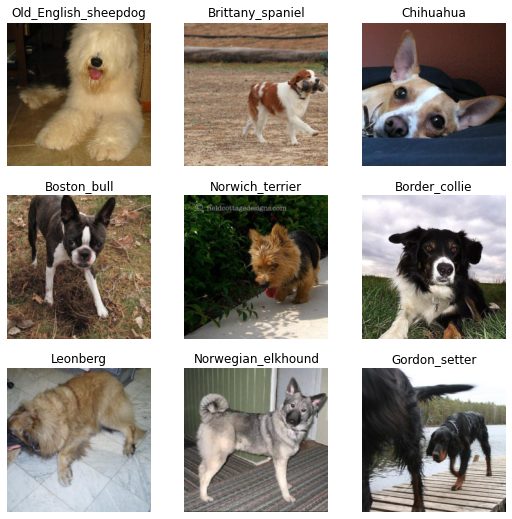

In [23]:
dls.show_batch()

In [24]:
# Number of classes
dls.c

120

In [25]:
# one batch of data
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

# Model

In [26]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

In [27]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.738132,0.919235,0.712342,01:52


epoch,train_loss,valid_loss,accuracy,time
0,1.047888,0.699776,0.783042,01:54


In [28]:
learn.export()

In [ ]:
import torchvision.models as models
model = models.resnet18()
model.last_linear = nn.Sequential(nn.Linear(512,dls.c))

In [ ]:
learn = Learner(dls, model, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,4.258797,4.124521,0.065598,02:46
